# Demonstrate BH Reference System Features

View this notebook in [NB viewer](https://nbviewer.jupyter.org/github/cmerwich/bh-reference-system/blob/master/2.%20Demonstrate%20Reference%20Features.ipynb)

# 0. Introduction

As indicated in the notebook '1. Export Features', Biblical Hebrew (BH), like other languages, makes use of all kinds of features within the language to establish text-coherence and to ensure that the reader or listener understands to whom or what is being referred to. The new features that were exported are:

* Personal pronouns, `pgn_prps`; 
* Demonstrative pronouns, `pgn_prde`; 
* The `verb` without suffix, `pgn_verb`; 
* The `verb` and its suffix `prs` (if the verb has one), `pgn_verb_prs`; 
* The suffix `prs` of a word, `pgn_prs`; 

These five TF features give the Person, Gender and Number (PGN) properties (if there) of a word. 

This notebook demonstrates some things you can do with the new features. 

## 0.1 Import some modules and utils

In [1]:
import sys, os, re, pickle, csv, collections
from collections import *
from IPython.display import HTML
from pprint import pprint
from functools import reduce

from tf.fabric import Fabric
from tf.transcription import Transcription
from tf.extra.bhsa import Bhsa
from participant_helpers import * 

import numpy as np
from pandas import DataFrame, read_csv
import pandas as pd
from random import random
import matplotlib.pyplot as plt

## 0.2 Pull in the data 

In [2]:
VERSION = 'c'
DATABASE = '~/github/etcbc'
BHSA = f'bhsa/tf/{VERSION}'
REFERENCE = f'bh-reference-system/tf/{VERSION}'
TF = Fabric(locations=[DATABASE], modules=[BHSA, REFERENCE], silent=False )

This is Text-Fabric 4.0.3
Api reference : https://dans-labs.github.io/text-fabric/Api/General/
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

119 features found and 0 ignored


Make sure you specify from which location on your computer TF can load the reference features, in my case: '~/github/bh-reference-system': 

## 0.3 Load features

In [3]:
api = TF.load('''
    otype
    lex book chapter verse
    nu ps gn prs ls lex
    function sp typ pdp language 
    pgn_prps pgn_prde pgn_verb 
    pgn_verb_prs pgn_prs
''', silent=True)

api.makeAvailableIn(globals())

B = Bhsa(api, '2. Demonstrate Reference Features', version=VERSION)

**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/Bhsa/" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/" title="text-fabric-api">Text-Fabric API 4.0.3</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/#search-templates" title="Search Templates Introduction and Reference">Search Reference</a>


This notebook online:
<a target="_blank" href="http://nbviewer.jupyter.org/github/etcbc/bh-reference-system/blob/master/2. Demonstrate Reference Features.ipynb">NBViewer</a>
<a target="_blank" href="https://github.com/etcbc/bh-reference-system/blob/master/2. Demonstrate Reference Features.ipynb">GitHub</a>


# 1. Frequency of verbs with a suffix

With the new features, you can use F.[YOUR-FEATURE].freqList(), to check the frequencies of it's values. The highest frequency comes first. Let's see what frequencies FreqList() returns for `pgn_verb_prs`. See the cell below this one. 

* The top one, ('P3Msg P3Msg_o'), with 602 occurrences, means that PGN of the verb is 3 masculine singular, and it has an object suffix (i.e. the *_o*; the *_s* ending stands for subject suffix) with a PGN of 3 masculine singular. 

* ('UUU P3Msg_s') with 302 occurrences, is an infinitive (UUU stands for Unknown Person, Unknown Number, Unknown gender) with a 3 masculine singular subject suffix. 

* ('UMsg P2Msg_o') with 52 occurrences, is a participle with PGN: Unknown Person (i.e. the 'U'), masculine singular. The participle has an object suffix with PGN 2 masculine singular. 

In [4]:
F.pgn_verb_prs.freqList()

(('P3Msg P3Msg_o', 602),
 ('P2Msg P1Csg_o', 403),
 ('P3Msg P3Mpl_o', 389),
 ('P1Csg P2Msg_o', 317),
 ('UUU P3Msg_s', 302),
 ('P3Msg P1Csg_o', 294),
 ('P3Msg P3Fsg_o', 258),
 ('P3Msg P2Msg_o', 248),
 ('P1Csg P3Mpl_o', 224),
 ('P1Csg P3Msg_o', 200),
 ('UUU P3Msg_o', 172),
 ('P3Mpl P3Msg_o', 165),
 ('P2Msg P3Msg_o', 157),
 ('UUU P3Mpl_s', 154),
 ('UUU P1Csg_s', 152),
 ('P2Msg P3Mpl_o', 151),
 ('UUU P3Mpl_o', 130),
 ('UUU P2Msg_s', 126),
 ('P3Mpl P3Mpl_o', 98),
 ('UUU P3Fsg_o', 94),
 ('P3Fsg P3Msg_o', 91),
 ('P3Cpl P1Csg_o', 90),
 ('P3Msg P1Cpl_o', 86),
 ('P2Msg P1Cpl_o', 83),
 ('P1Csg P3Fsg_o', 80),
 ('UUU P2Mpl_s', 73),
 ('P1Csg P2Fsg_o', 69),
 ('UUU P2Msg_o', 69),
 ('UUU P1Csg_o', 68),
 ('P2Msg P3Fsg_o', 60),
 ('P3Mpl P1Csg_o', 58),
 ('P3Cpl P3Mpl_o', 56),
 ('P3Fsg P1Csg_o', 56),
 ('UMsg P2Msg_o', 52),
 ('P3Cpl P3Msg_o', 51),
 ('P2Mpl P3Msg_o', 47),
 ('P3Fsg P3Mpl_o', 45),
 ('P2Mpl P1Csg_o', 43),
 ('P3Mpl P2Msg_o', 40),
 ('P3Mpl P3Fsg_o', 39),
 ('P3Cpl P2Msg_o', 37),
 ('P1Cpl P3Msg_o', 

In [5]:
F.pgn_prs.freqList()

(('P3Msg', 13593),
 ('P1Csg', 7887),
 ('P3Mpl', 7153),
 ('P2Msg', 7134),
 ('P3Fsg', 3513),
 ('P2Mpl', 2667),
 ('P1Cpl', 1645),
 ('P2Fsg', 1308),
 ('P3Fpl', 239),
 ('P2Fpl', 19))

# 2. Count all new features for each HB book


Now that we've got all those features of Person, Gender and Number, we are going to collect counts of all PGN for each HB book. In addition, the counts will be enriched with some extra information to make sense of it all. I use Pandas for this.

The sections 2.5-2.8 will give answers to the following questions:

1. What PGN are in which HB book? 
2. How many PGN are in which HB book?
3. What is the total PGN per HB book?
4. What is the ratio of PGN per verse per HB book? 

Before we do that, we do the counting with `get_all_pgn()` and do some Pandas administration in sections 2.1-2.4.

In [6]:
def get_all_pgn():

    book_list = []
    pgn_prps_dict = defaultdict(lambda: defaultdict(int))
    pgn_prde_dict = defaultdict(lambda: defaultdict(int))
    pgn_verb_dict = defaultdict(lambda: defaultdict(int))
    pgn_prs_dict = defaultdict(lambda: defaultdict(int))
    art_dict = collections.Counter()

    for book in F.otype.s('book'):
        book_name = T.bookName(book)
        book_list.append(book_name) # may need this later
        
        for w in L.d(book, 'word'):
            pdp = F.pdp.v(w)
            pgn_prps = F.pgn_prps.v(w)
            pgn_prde = F.pgn_prde.v(w)
            pgn_verb = F.pgn_verb.v(w)
            pgn_prs = F.pgn_prs.v(w)
            pgn_verb_prs = F.pgn_verb_prs.v(w)

            if pgn_prps:

                pgn_prps_dict[book_name][pgn_prps] += 1
                for prps in prps_set:
                    if prps not in pgn_prps_dict[book_name]:
                        pgn_prps_dict[book_name][prps] = 0

            if pgn_prde:

                pgn_prde_dict[book_name][pgn_prde] += 1 
                for prde in prde_set:
                    if prde not in pgn_prde_dict[book_name]:
                        pgn_prde_dict[book_name][prde] = 0
                    if 'Nahum' not in pgn_prde_dict[book_name]: # bible_book Nahum doesn't contain the feature prde \
                        pgn_prde_dict['Nahum'][prde] = 0        #  so add 0

            if pgn_verb:

                pgn_verb_dict[book_name][pgn_verb] += 1
                for pgn in pgn_set:
                    if pgn not in pgn_verb_dict[book_name]:
                        pgn_verb_dict[book_name][pgn] = 0

            if pgn_prs:

                pgn_prs_dict[book_name][pgn_prs] += 1
                for prs in prs_set:
                    if prs not in pgn_prs_dict[book_name]:
                        pgn_prs_dict[book_name][prs] = 0

            if pdp == 'art':

                art_dict[book_name] += 1
    
    return pgn_prps_dict, pgn_prde_dict, pgn_verb_dict, pgn_prs_dict, art_dict 

#get_all_pgn()

## 2.1 Make Pandas dataframes

Pandas makes it possible to make a dataframe from the dictionaries that we just made. In order to select any HB book in the dataframe you want, pass 'index' as an argument. This makes the keys from the dict the rows. Downside is that the canonical order of the HB can not maintained, as far as I know. 


In [7]:
pgn_prps_dict, pgn_prde_dict, pgn_verb_dict, pgn_prs_dict, art_dict = get_all_pgn()

# prps
pgn_prps_df = pd.DataFrame.from_dict(pgn_prps_dict, orient='index') 

# prde
pgn_prde_df = pd.DataFrame.from_dict(pgn_prde_dict, orient='index')

# verb
pgn_verb_df = pd.DataFrame.from_dict(pgn_verb_dict, orient='index')

# prs
pgn_prs_df = pd.DataFrame.from_dict(pgn_prs_dict, orient='index')

## 2.2 How many verses per HB book?

This tells us how big the HB book is qua verses. 

In [8]:
info('Counting all verses per book in the Hebrew Bible')

verse_count_dict = defaultdict(int)

for book in F.otype.s('book'):
    book_name = T.bookName(book)
    for verse in L.d(book, 'verse'):
        verse_count_dict[book_name] += 1
        total_verses_hb = sum(verse_count_dict.values())
        v_per_book = verse_count_dict.get(book, 0)

info('Counting is done')

    42s Counting all verses per book in the Hebrew Bible
    43s Counting is done


## 2.3 Get all genres within the HB

The division in three genres is coarse, but it does gives an indication of what kind of genre the HB book mostly contains. 

In [9]:
prose = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges', '1_Samuel', '2_Samuel', 
         '1_Kings', '2_Kings', 'Jonah', 'Ruth', 'Esther', 'Daniel', 'Ezra', 'Nehemiah', '1_Chronicles', '2_Chronicles']
prophecy = ['Isaiah', 'Jeremiah', 'Ezekiel', 'Hosea', 'Joel', 'Obadiah', 'Micah', 'Zephaniah', 'Haggai', 'Zechariah', 
            'Malachi', 'Amos', 'Nahum', 'Habakkuk']
poetry = ['Song_of_songs','Proverbs','Ecclesiastes', 'Lamentations', 'Psalms', 'Job']
genre_dict = collections.defaultdict()


for genre in [prose, prophecy, poetry]:
    for book in genre:
        if book in prose:
            genre_dict[book] = 'prose'
        elif book in prophecy:
            genre_dict[book] = 'prophecy'
        elif book in poetry:
            genre_dict[book] = 'poetry'

## 2.4 Merge verse count and genre per book

Here we merge the verses count and genre per book dictionaries into a pandas dataframe called 'verse_count_genre'. The information of this dictionary is added to all the counts of the other PGN features. 

In [10]:
genre_left = pd.DataFrame.from_dict(genre_dict, orient='index')
verses_right = pd.DataFrame.from_dict(verse_count_dict, orient='index')

verse_count_genre = pd.merge(genre_left, verses_right, left_index = True, right_index = True, sort=False)
verse_count_genre.columns = ['genre', 'verse_count']

#verse_count_genre

## 2.5 Personal Pronouns (prps)

In [11]:
# merge the verse count and prps dataframes
pgn_prps_count = pd.merge(verse_count_genre, pgn_prps_df, left_index = True, right_index = True, sort=False)

# add all prps 
pgn_prps_count['total_prps'] = pgn_prps_count['P3Msg'] + pgn_prps_count['P2Mpl'] + pgn_prps_count['P1Cpl'] + \
                            pgn_prps_count['P2Fsg'] + pgn_prps_count['P3Fsg'] + pgn_prps_count['P2Fpl'] + \
                            pgn_prps_count['P2Msg'] + pgn_prps_count['P3Mpl'] + pgn_prps_count['P1Csg'] + \
                            pgn_prps_count['P3Fpl']

# calculate ratio of prps to verses
pgn_prps_count['ratio_prps'] = round(pgn_prps_count['total_prps'] / pgn_prps_count['verse_count'], 2)

# inspect the dataframe
pgn_prps_count

,genre,verse_count,P3Msg,P2Msg,P3Fsg,P3Mpl,P2Fsg,P2Fpl,P3Fpl,P1Csg,P1Cpl,P2Mpl,total_prps,ratio_prps
Genesis,prose,1533,105,46,50,21,6,1,7,97,17,17,367,0.24
Exodus,prose,1213,56,39,7,22,0,0,3,61,1,16,205,0.17
Leviticus,prose,859,88,2,66,19,0,0,4,71,0,5,255,0.30
Numbers,prose,1289,49,22,21,30,1,0,2,28,5,19,177,0.14
Deuteronomy,prose,959,71,66,10,15,0,0,1,65,5,25,258,0.27
Joshua,prose,658,33,12,23,12,0,0,0,13,8,23,124,0.19
Judges,prose,618,41,20,13,17,5,0,1,29,6,17,149,0.24
1_Samuel,prose,811,57,46,6,20,1,0,1,46,5,10,192,0.24
2_Samuel,prose,695,36,43,4,8,0,0,2,54,1,5,153,0.22
1_Kings,prose,817,54,47,7,23,5,0,0,37,3,5,181,0.22


## 2.6 Demonstrative Pronouns (prde)

In [12]:
# merge the verse count and prde dataframes
pgn_prde_count = pd.merge(verse_count_genre, pgn_prde_df, left_index = True, right_index = True, sort=False)

# add all prde
pgn_prde_count['total_prde'] = pgn_prde_count['Cpl-2'] + pgn_prde_count['Fsg-1'] + pgn_prde_count['Msg'] + \
                            pgn_prde_count['Csg'] + pgn_prde_count['Fsg-2'] + pgn_prde_count['Fsg'] + \
                            pgn_prde_count['Cpl-1'] + pgn_prde_count['Msg-1'] + pgn_prde_count['Fsg-3']

# calculate ratio of prde to verses
pgn_prde_count['ratio_prde'] = round(pgn_prde_count['total_prde'] / pgn_prde_count['verse_count'], 2)

# inspect the dataframe      
pgn_prde_count

,genre,verse_count,Cpl-2,Fsg-1,Fsg-2,Msg-1,Fsg-3,Fsg,Msg,Cpl-1,Csg,total_prde,ratio_prde
Genesis,prose,1533,90,52,0,80,0,0,2,4,0,228,0.15
Exodus,prose,1213,26,17,0,90,0,0,0,0,0,133,0.11
Leviticus,prose,859,26,24,0,18,0,0,0,1,0,69,0.08
Numbers,prose,1289,73,33,0,63,0,0,0,0,0,169,0.13
Deuteronomy,prose,959,48,53,0,72,0,0,0,3,0,176,0.18
Joshua,prose,658,51,29,0,50,0,0,0,0,0,130,0.20
Judges,prose,618,11,18,1,39,0,0,0,0,1,70,0.11
1_Samuel,prose,811,27,14,0,93,0,0,0,0,2,136,0.17
2_Samuel,prose,695,15,26,1,45,0,0,0,0,0,87,0.13
1_Kings,prose,817,20,14,1,81,0,0,0,0,0,116,0.14


## 2.7 PGN of Verbs 

In [13]:
# merge the verse count and pgn verb dataframes
pgn_verb_count = pd.merge(verse_count_genre, pgn_verb_df, left_index = True, right_index = True, sort=False)

# add all pgn verbs
pgn_verb_count['total_verb'] = pgn_verb_count['P3Msg'] + pgn_verb_count['P2Mpl'] + pgn_verb_count['P1Cpl'] + \
                            pgn_verb_count['P2Fsg'] + pgn_verb_count['P3Cpl'] + pgn_verb_count['P3Fsg'] + \
                            pgn_verb_count['P2Fpl'] + pgn_verb_count['UFsg'] + pgn_verb_count['P2Msg'] + \
                            pgn_verb_count['UFpl'] + pgn_verb_count['P3Mpl'] + pgn_verb_count['P1Csg'] + \
                            pgn_verb_count['P3Fpl'] + pgn_verb_count['UUU'] + pgn_verb_count['UMpl'] + \
                            pgn_verb_count['UMsg']

# calculate ratio of pgn verbs to verses
pgn_verb_count['ratio_verb'] = round(pgn_verb_count['total_verb'] / pgn_verb_count['verse_count'], 2)
                    
# inspect the dataframe
pgn_verb_count

,genre,verse_count,P3Msg,UFpl,P2Msg,P3Cpl,UMpl,P3Fsg,UMsg,P3Mpl,P2Fsg,P2Fpl,P3Fpl,UFsg,P1Csg,P1Cpl,UUU,P2Mpl,total_verb,ratio_verb
Genesis,prose,1533,2152,17,391,162,43,376,167,366,31,3,28,26,379,120,439,190,4890,3.19
Exodus,prose,1213,1365,12,602,168,46,118,124,279,4,7,17,5,222,35,348,171,3523,2.90
Leviticus,prose,859,1196,7,149,68,14,198,101,92,0,0,10,31,84,3,200,238,2391,2.78
Numbers,prose,1289,1047,3,242,189,73,132,97,386,6,0,12,50,124,63,318,217,2959,2.30
Deuteronomy,prose,959,984,4,695,141,43,108,236,129,0,0,3,9,182,59,467,262,3322,3.46
Joshua,prose,658,686,3,85,145,32,46,47,270,7,0,3,7,66,39,222,172,1830,2.78
Judges,prose,618,900,2,148,127,40,160,88,405,32,0,5,12,131,60,225,114,2449,3.96
1_Samuel,prose,811,1436,7,273,128,62,182,151,342,26,0,13,12,214,60,341,148,3395,4.19
2_Samuel,prose,695,1216,2,214,93,34,139,107,220,21,1,5,11,197,23,278,56,2617,3.77
1_Kings,prose,817,1378,11,305,100,74,125,106,204,31,0,4,25,177,20,321,68,2949,3.61


## 2.8 Suffixes (prs)

In [14]:
# merge the verse count and prs dataframes
pgn_prs_count = pd.merge(verse_count_genre, pgn_prs_df, left_index = True, right_index = True, sort=False)

# add all prs
pgn_prs_count['total_prs'] = pgn_prs_count['P3Msg'] + pgn_prs_count['P2Mpl'] + pgn_prs_count['P1Cpl'] + \
                            pgn_prs_count['P2Fsg'] + pgn_prs_count['P3Fsg'] + pgn_prs_count['P2Fpl'] + \
                            pgn_prs_count['P2Msg'] + pgn_prs_count['P3Mpl'] + pgn_prs_count['P1Csg'] + \
                            pgn_prs_count['P3Fpl']

# calculate ratio of prs to verses
pgn_prs_count['ratio_prs'] = round(pgn_prs_count['total_prs'] / pgn_prs_count['verse_count'], 2)
            
# inspect the dataframe
pgn_prs_count

,genre,verse_count,P3Msg,P2Msg,P3Fsg,P3Mpl,P2Fsg,P2Fpl,P3Fpl,P1Csg,P1Cpl,P2Mpl,total_prs,ratio_prs
Genesis,prose,1533,1183,532,263,340,40,3,28,664,141,154,3348,2.18
Exodus,prose,1213,857,369,149,392,3,1,15,216,72,157,2231,1.84
Leviticus,prose,859,800,156,211,243,0,0,16,78,1,271,1776,2.07
Numbers,prose,1289,581,149,201,553,11,0,17,131,72,175,1890,1.47
Deuteronomy,prose,959,612,1234,179,301,0,0,3,131,107,336,2903,3.03
Joshua,prose,658,204,59,179,324,13,0,36,48,93,213,1169,1.78
Judges,prose,618,493,129,127,248,11,0,1,177,65,61,1312,2.12
1_Samuel,prose,811,707,314,83,145,18,0,4,344,88,101,1804,2.22
2_Samuel,prose,695,554,287,75,104,15,1,1,318,40,27,1422,2.05
1_Kings,prose,817,672,332,80,168,31,0,2,299,30,21,1635,2.00


# 3.0 PGN occurrences visualised

So, we have the following information that can be inspected further. 

* pgn_prps_count
* pgn_prde_count
* pgn_verb_count
* pgn_prs_count

Let's do some exploration of the PGN information by zooming in on the Psalms and visualising counts per HB genre: prose, poetry and poetry. 

## 3.1 Add up all PGN occurrences within the Psalms

In [15]:
psalms_prps = pgn_prps_count.loc[['Psalms']]['total_prps'] 

psalms_prde = pgn_prde_count.loc[['Psalms']]['total_prde'] 

psalms_verb = pgn_verb_count.loc[['Psalms']]['total_verb'] 

psalms_prs = pgn_prs_count.loc[['Psalms']]['total_prs'] 

total_psalms = psalms_prps + psalms_prde + psalms_verb + psalms_prs 


print('Total of all PGN in the Psalms: {}\n\n \
      Total of personal pronouns: {}\n \
      Total of demonstrative pronouns: {}\n \
      Total of PGN of verbs: {}\n \
      Total of suffixes: {}'.format(total_psalms[0], psalms_prps[0], psalms_prde[0], psalms_verb[0], psalms_prs[0]))

Total of all PGN in the Psalms: 10288

       Total of personal pronouns: 294
       Total of demonstrative pronouns: 49
       Total of PGN of verbs: 5294
       Total of suffixes: 4651


## 3.2 Stacked plot of the totals per HB book

Now we make new dataframes from all totals of prps, prde, verb and prs, verse count and genre. Also the index will be reset. The `bible_books` column functioned as index before. The `totals` dataframe is then plotted as stacked bars. The stacked bar makes it possible compare the counts of the features per bible book with each other. 

In [16]:
total_prps = pd.DataFrame(pgn_prps_count[['total_prps', 'genre', 'verse_count']]).reset_index()
total_prps.columns = ['bible_book', 'total_prps', 'genre', 'verse_count']

total_prde = pd.DataFrame(pgn_prde_count[['total_prde', 'genre', 'verse_count']]).reset_index()
total_prde.columns = ['bible_book', 'total_prde', 'genre', 'verse_count']

total_verb = pd.DataFrame(pgn_verb_count[['total_verb', 'genre', 'verse_count']]).reset_index()
total_verb.columns = ['bible_book', 'total_verb', 'genre', 'verse_count']

total_prs = pd.DataFrame(pgn_prs_count[['total_prs', 'genre', 'verse_count']]).reset_index()
total_prs.columns = ['bible_book', 'total_prs', 'genre', 'verse_count']

dfs = [total_prps, total_prde, total_verb, total_prs]
totals = reduce(lambda left, right: pd.merge(left, right, on=['bible_book', 'genre', 'verse_count']), dfs)

# Uncomment to inspect the dataframe
#totals 

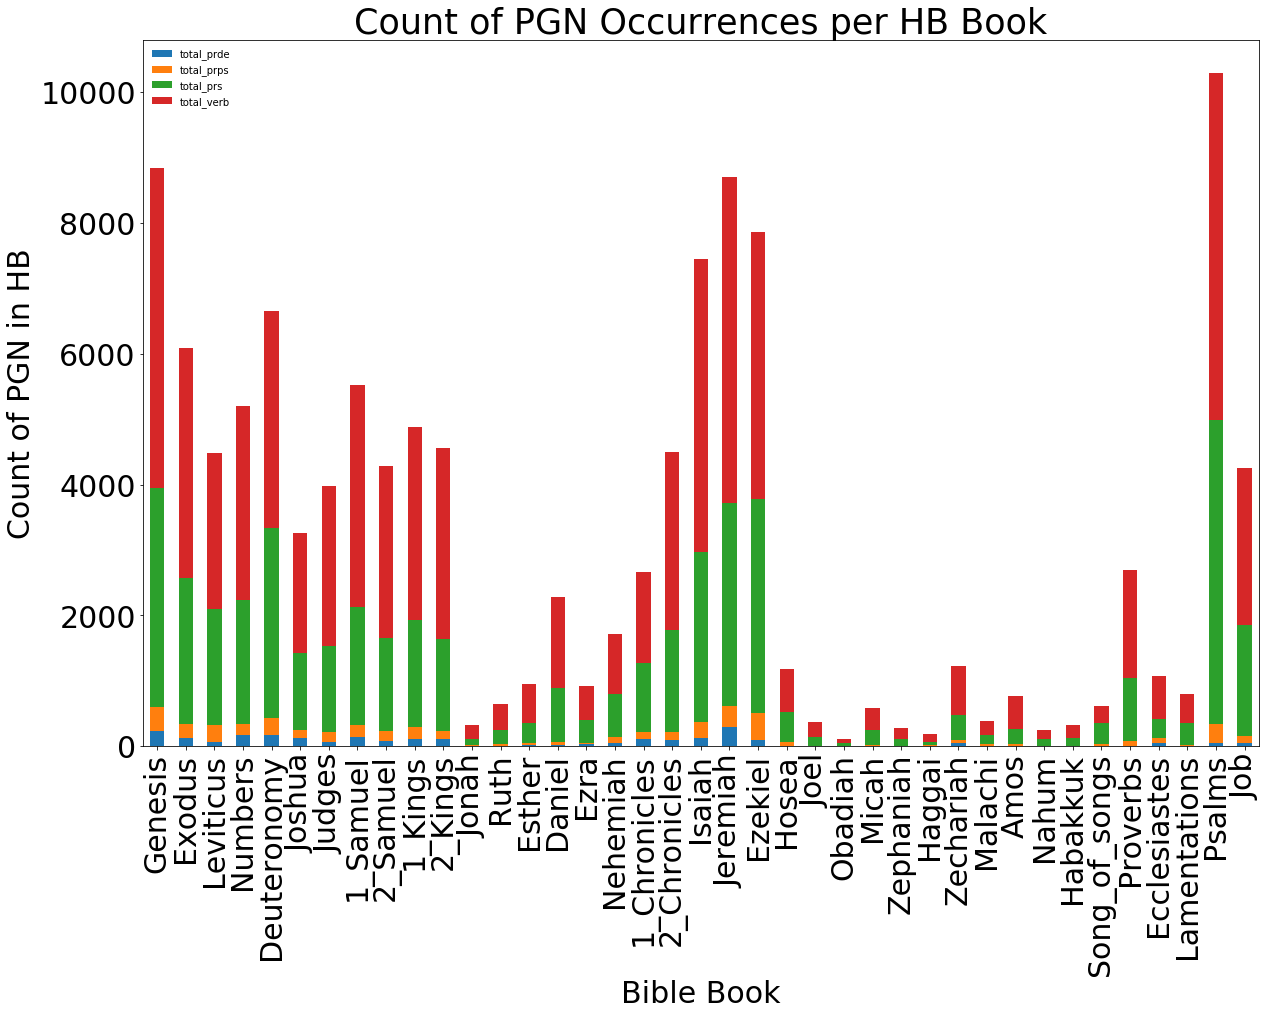

In [17]:
exclude = ['verse_count'] # exclude this column for now

totals.loc[:, totals.columns.difference(exclude)].plot(kind='bar', x='bible_book', stacked=True, fontsize=30, figsize=(20, 13), sort_columns=True)

plt.title(('Count of PGN Occurrences per HB Book'), fontsize=35)
plt.xlabel('Bible Book', fontsize=30)
plt.ylabel('Count of PGN in HB', fontsize=30)
plt.legend(frameon=False)
plt.show()

### 3.2.1 Some interpretation 

Pandas plots the bible books per genre: prose on the left; prophecy in the middle; and poetry on the right. The HB consists for the greater part of prose, this is also visible in PGN count. The Psalms is a big bible book in terms of verses, but also stands out in terms of PGN information.

## 3.3 Group and compare the PGN counts per HB genre

It would be interesting to see which HB genre has the largest number of PGN occurrences in relation to 1. the total of verses within that genre, and 2. the total of verses within the HB. In other words: we calculate PGN occurrences in proportion to the total of verses, i.e. the ratio. In more, other words: with the PGN ratios we see which HB genre uses more PGN forms, e.g. to establish text-coherence. For text-coherence we need to study larger units of text, that is why we choose the verse as a calculation unit for now. 

To do that we take the `totals` dataframe that we just made and count the totals of the features that we are studying per Hebrew Bible genre, not per bible book. The ratio of PGN per verse in the HB is added (`'total_ratio'`), along with the ratio of PGN per HB genre (`'total_ratio_genre'`). After we have done this we plot two stacked barcharts.

1. The first graph gives total counts of the features per genre
2. The second graph gives the `'total_ratio'` and `'total_ratio_genre'`. 

In [18]:
sum_genre = totals.groupby(['genre']).sum()

sum_genre['total_pgn'] = sum_genre['total_prps'] + sum_genre['total_prde'] + sum_genre['total_verb'] \
+ sum_genre['total_prs']


sum_genre['total_ratio_genre'] = round(sum_genre['total_pgn'] / sum_genre['verse_count'], 2)

sum_genre['total_ratio'] = round(sum_genre['total_pgn'] / (sum(sum_genre['verse_count'])), 2)

# Uncomment to inspect the dataframe
sum_genre

,total_prps,verse_count,total_prde,total_verb,total_prs,total_pgn,total_ratio_genre,total_ratio
genre,,,,,,,,
poetry,584,5005,167,10711,8268,19730,3.94,0.85
prophecy,1201,4930,613,16935,10944,29693,6.02,1.28
prose,2667,13278,1752,41380,25946,71745,5.40,3.09


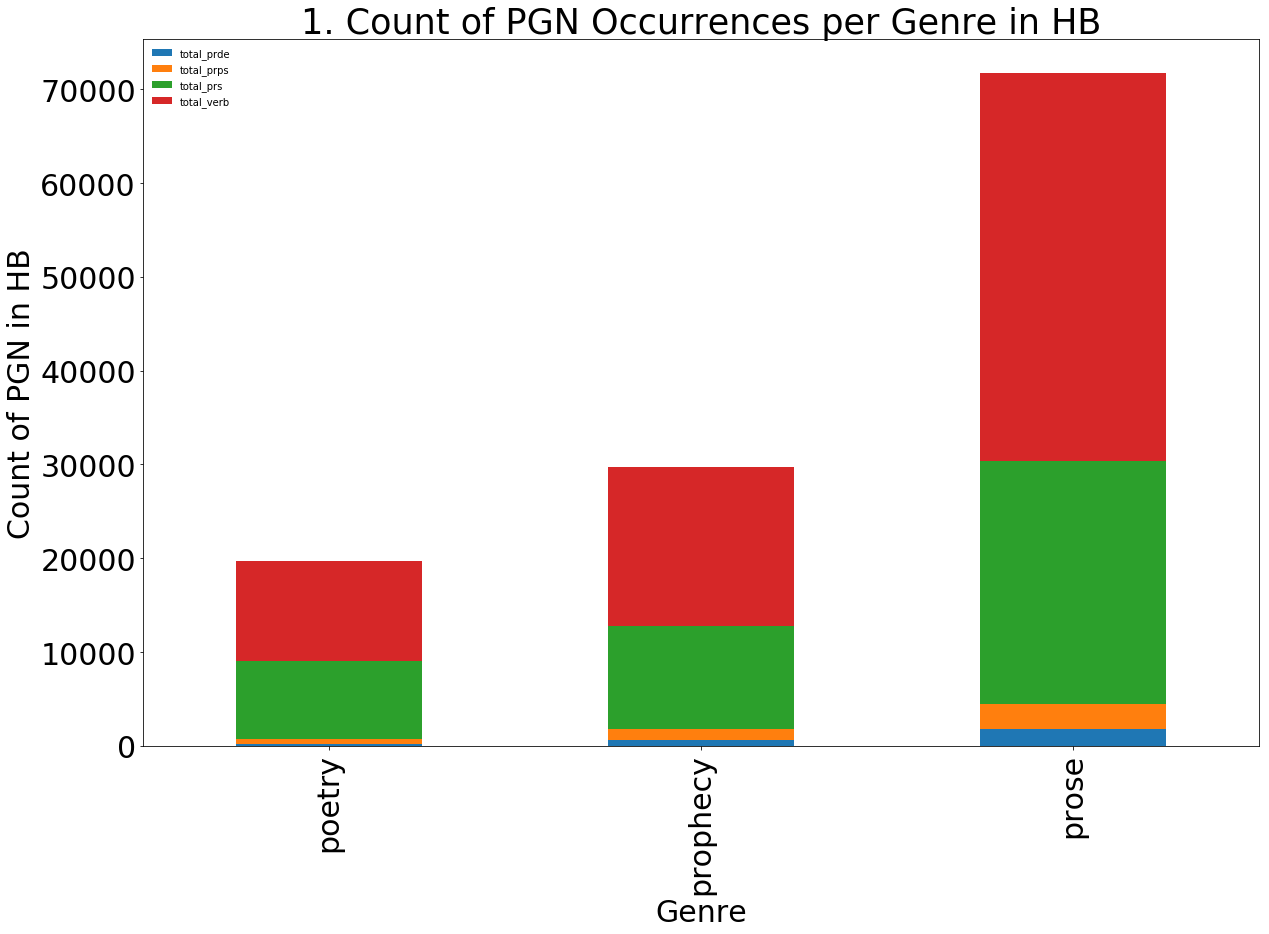

In [19]:
exclude_more = ['verse_count', 'total_pgn', 'total_ratio', 'total_ratio_genre']

sum_genre.loc[:, sum_genre.columns.difference(exclude_more)].plot(kind='bar', stacked=True, fontsize=30, \
                                                                  figsize=(20, 13), sort_columns=True)

plt.title(('1. Count of PGN Occurrences per Genre in HB'), fontsize=35)
plt.xlabel('Genre', fontsize=30)
plt.ylabel('Count of PGN in HB', fontsize=30)
plt.legend(loc='upper left', frameon=False)
plt.show()

### 3.3.1 Some interpretation

In terms of verse count prose (13278) is the biggest genre in the HB, after that come poetry (5005) and prophecy (4930). As the biggest corpus in the HB, prose has the highest number of PGN occurrences. This is not really a surprise. 

What is surprising though is the difference of ~10000 PGN occurrences (to be precise: 29693 - 19730 = 9963) between prophecy and poetry. Poetry is a bigger corpus (with 75 verses more) than prophecy, but there is a pretty big difference between the two genres when we look at the PGN occurrences. Further research is needed as to why that is.

## 3.4 PGN occurrences per HB genre 

In the graph below the total of PGN occurences within a genre is divided by the total of verses in the HB: `total ratio`, green bar.

The red bar, `total ratio genre`, gives the total of PGN occurrences within a genre divided by the total of verses within an HB genre. 

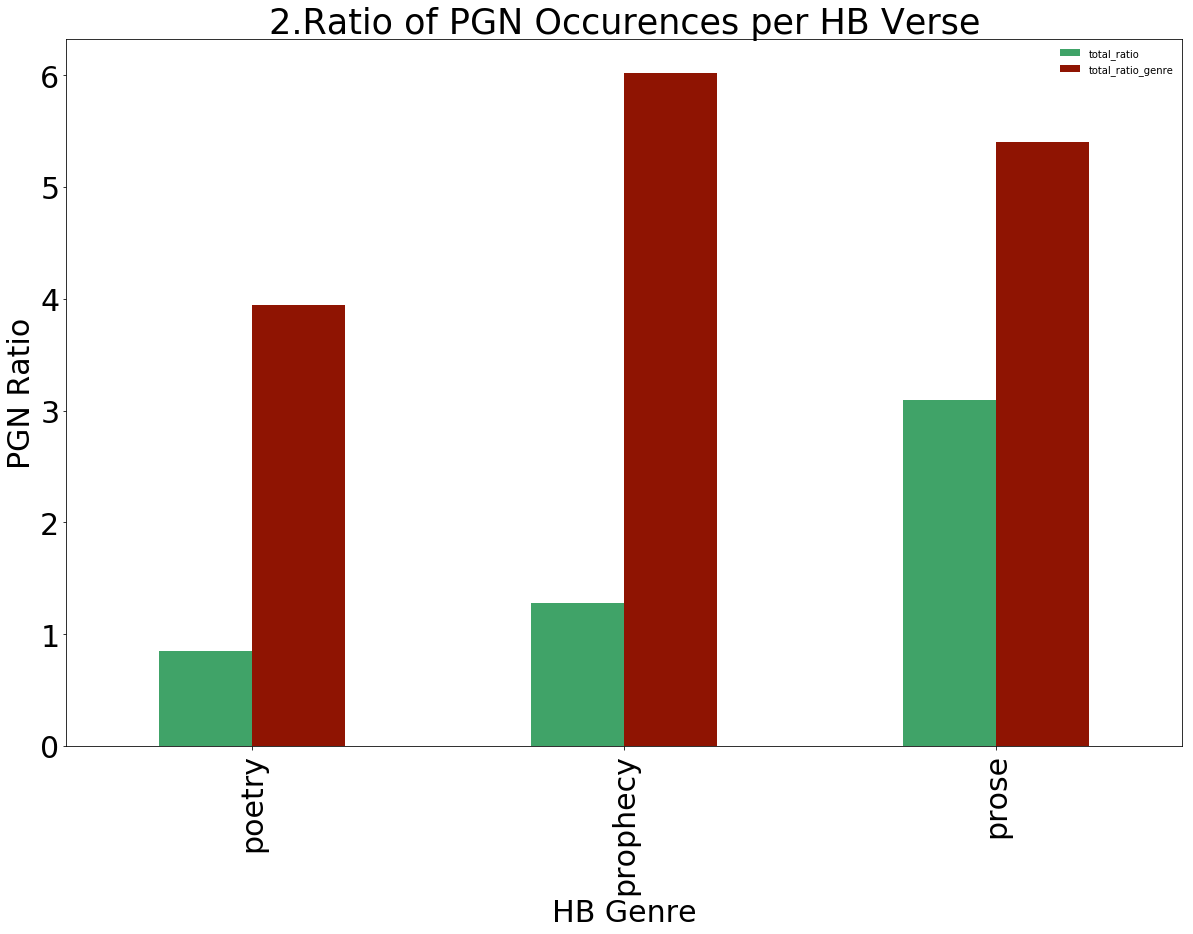

In [20]:
only_ratio = ['total_prps', 'total_prde', 'total_verb','total_prs', 'verse_count', 'total_pgn']

sum_genre.loc[:, sum_genre.columns.difference(only_ratio)].plot(kind='bar', fontsize=30, \
                                                                  figsize=(20, 13), sort_columns=True, \
                                                                color=('xkcd:greenish', 'xkcd:brick red'))

plt.title(('2.Ratio of PGN Occurences per HB Verse'), fontsize=35)
plt.xlabel('HB Genre', fontsize=30)
plt.ylabel('PGN Ratio', fontsize=30)
plt.legend(frameon=False)
plt.show()

### 3.4.1 Some interpretation

The green bar gives the same picture as in the first graph: prose has the most PGN occurrences, because it is the largest corpus. 

The red bar however, shows that prophecy as the smallest corpus has the highest number of PGN occurrences per verse. Poetry has the smallest PGN occurence ratio of all genres. 

HB poetry, especially the Psalms which is about half of the poetry genre in the HB, is notorious for PGN shifts that are hard to follow. Further research has to be done as to why poetry has the lowest PGN ratio. 

# 4. Display features

The function below (`show_pgn`) uses TF's `B.show()` to display all new PGN features within a chosen HB text. B.show() highlights the features that you searched for within the data. It makes research into patterns of PGN shifts easier. 

1. Run `show_pgn`
2. In the cell below `show_pgn` fill in which HB book you want to study in string form
3. Give an integer to indicate for which chapter you want the PGN features to be displayed, like so:
4. show_pgn('Psalms', 75)

In [21]:
def show_pgn(BOOK_NAME, CHAPTER):

    results = []
    
    for book in F.otype.s('book'):
        book_name = T.bookName(book)
        if book_name == BOOK_NAME:
            for ch in L.d(book, 'chapter'):
                chapter = F.chapter.v(ch)
                
                if chapter == CHAPTER: 
                    tup = ()
                    
                    for w in L.d(ch, 'word'):
                        pdp = F.pdp.v(w)
                        pgn_prps = F.pgn_prps.v(w)
                        pgn_prde = F.pgn_prde.v(w)
                        pgn_verb = F.pgn_verb.v(w)
                        pgn_prs = F.pgn_prs.v(w)
                        pgn_verb_prs = F.pgn_verb_prs.v(w)
                        
                        if pgn_prps:
                            tup = tup + (w,)
                        if pgn_prde:
                            tup = tup + (w,)
                        if pgn_prs and not pgn_verb: 
                            tup = tup + (w,)
                        if pgn_verb and not pgn_prs:
                            tup = tup + (w,)
                        if pgn_verb_prs:
                            tup = tup + (w,)
                    
                    results.append(tup)
    
    B.show(results, condensed=False)

In [179]:
# 1. Fill in which HB book you want to study in string form:
# 2. Give an integer to indicate for which chapter you want the PGN features to be displayed


show_pgn('Psalms', 75)


##### Result 1
